# Linear_Regression_Bike_Sharing_Assignment

# Importing Necessary Libraries

In [1]:
#importing numpy and pandas python library for data handling.
import numpy as np
import pandas as pd

#importing matplotlib.pyplot and seaborn for data visualization. 
import matplotlib.pyplot as plt
import seaborn as sb

#importing warnings to suppress warnings. 
import warnings
warnings.filterwarnings(action='ignore')

# importing tqdm to know progress of loop in terms of progressbar.
from tqdm.notebook import tqdm

# day.csv Dataset Loading

## Data Understanding

In [2]:
# Loading the dataset and storing it in df variablle.
df=pd.read_csv('day (2).csv')

In [3]:
# checking sample of dataset.
df.head(50)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [4]:
# displaying count of rows and columns the dataset is having.
df.shape

(730, 16)

##### This dataset is having 730 rows and 12 columns.

In [5]:
# Knowing the datatype of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Preparation

In [6]:
# Checking on each columns do we have missing values.
100*df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
# droping irrelevant columns.
df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [8]:
# Mapping all non binary categorical columns to their original value, to make the column more understandable.
df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df['weathersit'].replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)


df['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

df['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)


In [9]:
# Displaying a sample of dataset after making changes.
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Segmentation

In [10]:
# Displaying count of unique values each column is having.
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [11]:
# Segmenting categorical, continuous, and target column and storing them in cat_cols, cont_cols, and target_col respectively.
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols=['temp','atemp','hum','windspeed']
target_col=['cnt']

In [12]:
# Perform a sanity check, to confirm does we have segmented all columns.
len(df.columns)==len(cat_cols)+len(cont_cols)+len(target_col)

True

## Exploratory Data Analysis

## Univariate Analysis

### Histplot

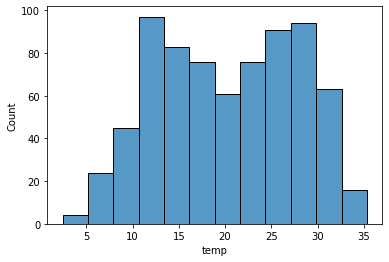

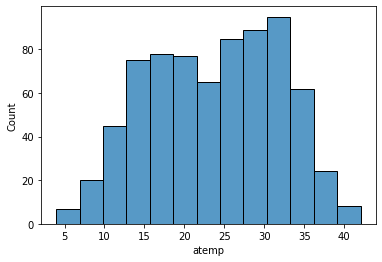

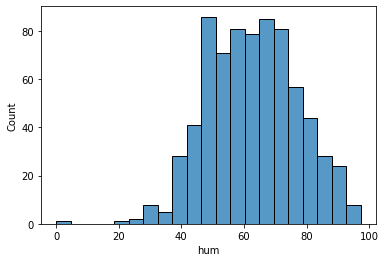

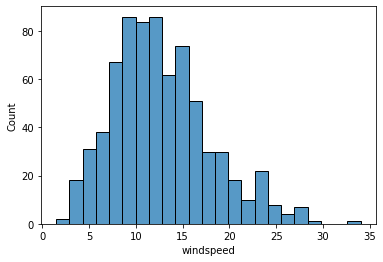

In [15]:
for i in cont_cols:
    sb.histplot(data=df,x=i)
    plt.show()

### Countplot

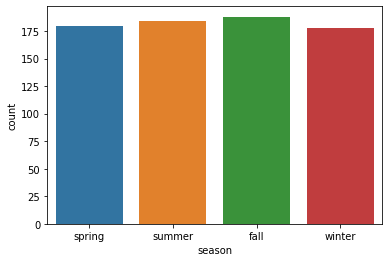

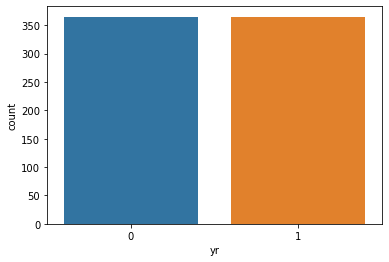

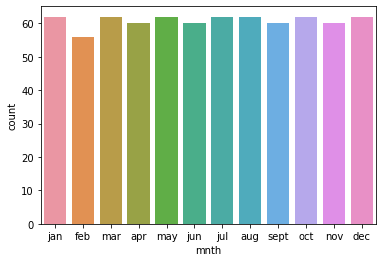

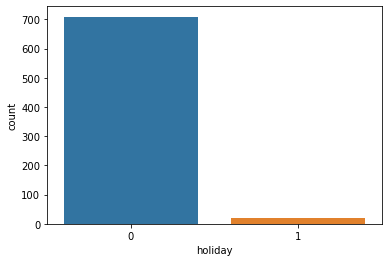

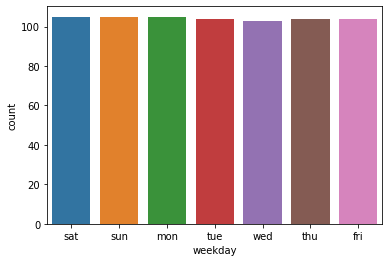

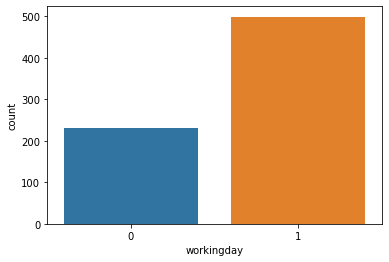

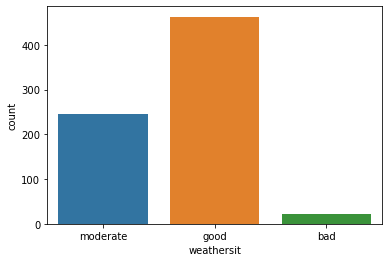

In [17]:
for i in cat_cols:
    sb.countplot(data=df, x=i)
    plt.show()


#### INFERENCES
##### 1)Season-> Almost all season have same level of demand.
##### 2)Year-> Both the years have same level of demand.
##### 3)Month-> Jan, mar, may, jul, aug, oct, dec months have higher level of demand. And feb month have lowest level of demand.
##### 4)Holiday-> Bike sharing demand is quite high in weekdays as compare to holidays.
##### 5)Weekday-> All weekday's almost have same level of demand.
##### 6)Weathersit-> Good weather have highest level of demand. And bad weather have lowest level of demand.

## Bivariate Analysis

### Scatterplot

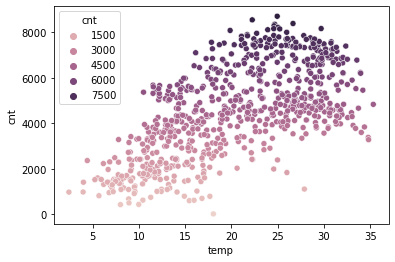

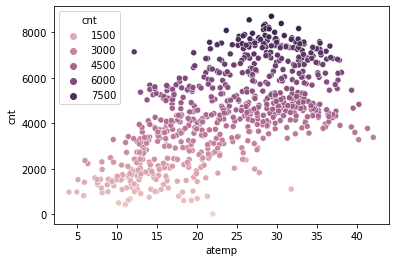

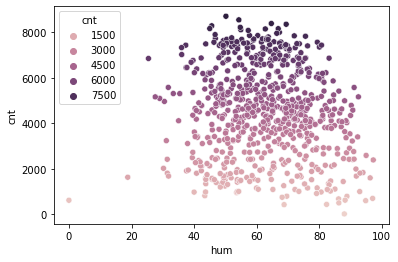

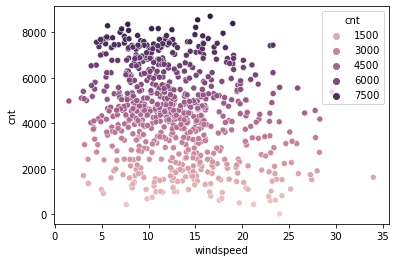

In [19]:
for i in cont_cols:
    sb.scatterplot(data=df,x=i,y='cnt', hue='cnt')
    plt.show()


#### INFERENCES
##### 1) Temp-> When Temperature between 15-30 degree celcius, demand for bike was high.
##### 2) Atemp-> When Feels like Temperature was between 15-35 degree celcius, demand for bike was high.
##### 3) Hum-> More the humidity less the demand.
##### 4) Windspeed-> When windspeed <20, bike demand was high.

## Multivariate Analysis

### Pairplot

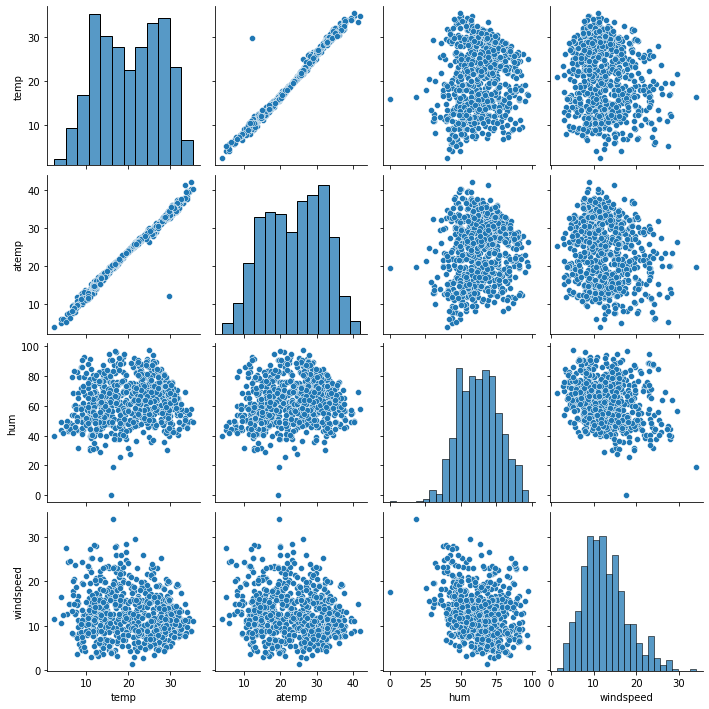

In [57]:
sb.pairplot(df[cont_cols])
#sns.pairplot(penguins, hue="species")

### Heatmap

<AxesSubplot:>

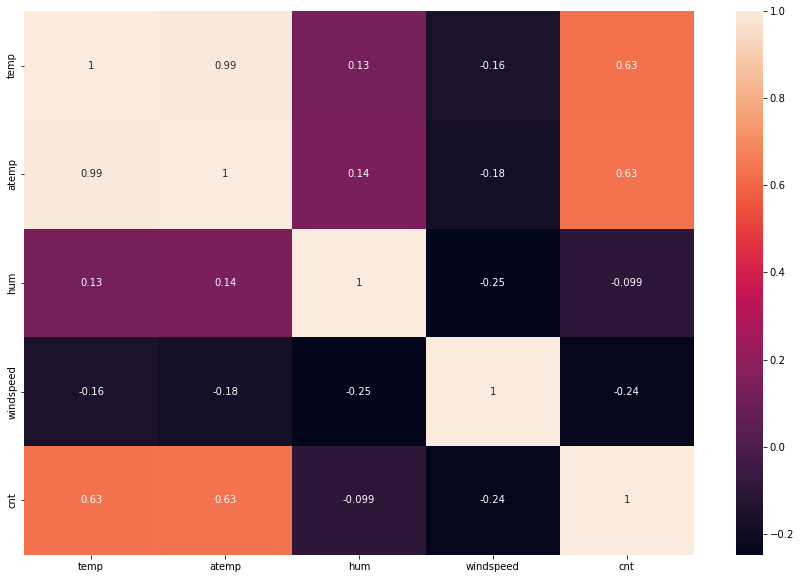

In [21]:
plt.figure(figsize=(15,10))
sb.heatmap(df[cont_cols+["cnt"]].corr(),annot=True)

## Pre-processing Steps

### Dummy Variable Creation

In [22]:
# Knowing the count of unique values for each categorical columns, to know which columns are non binary categorical columns.
df[cat_cols].nunique()# Only for non binary categorical columns

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [24]:
# creating dummmy columns for season non_binary categorical column, and droping one column among 4 dummy season columns.
# And storing it on dum1 variable.
dum1=pd.get_dummies(df['season'],drop_first=True)
dum1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
# creating dummmy columns for mnth non_binary categorical column, and droping one column among 12 dummy mnth columns.
# And storing it on dum2 variable.
dum2=pd.get_dummies(df['mnth'],drop_first=True)
dum2.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [26]:
# creating dummmy columns for weekday non_binary categorical column, and droping one column among 7 dummy weekday columns.
# And storing it on dum3 variable.
dum3=pd.get_dummies(df['weekday'],drop_first=True)
dum3.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [23]:
# creating dummmy columns for weathersit non_binary categorical column, and droping one column among 3 dummy weekday columns.
# And storing it on dum4 variable.
dum4=pd.get_dummies(df['weathersit'],drop_first=True)
dum4.head()

,good,moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [27]:
# Concat all the dummy columns into our original dataset and store it as df1 variable.
df1=pd.concat([df,dum1,dum2,dum3,dum4],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,1,0
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,1,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0


In [28]:
# Dropping original season, mnth, weekday, weathersit columns as we have created dummy columns on behalf of these 4 columns.
# And to reduce duplicacy we drop all these original columns and keep their dummy columns.
df1=df1.drop(columns=['season','mnth','weekday','weathersit'],axis=1)

In [29]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


### Train-Test Split

In [30]:
# Keep all columns other then cnt in X. 
X=df1.drop(["cnt"],axis=1)
# Keep cnt column in y.
y=df1["cnt"]

In [31]:
# Perform train test split. 70% train data, and 30% test data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)


In [32]:
# knowing the count of rows and columns in train dataset.
X_train.shape

(511, 29)

In [34]:
# Knowing the count of row and columns in test dataset.
X_test.shape

(219, 29)

## Scaling

In [35]:
#Standardization
#z=x-xmean/sigma
X_train=(X_train-X_train.mean())/X_train.std()


In [36]:
X_test=(X_test-X_test.mean())/X_test.std()


## Modelling

### Feature Selection

In [38]:
# Performing feature selection by RFE(automatic mmethod). Select top 15 features.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(X_train,y_train)
selector.support_


array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True])

In [40]:
# Storing 15 selected features in list.
selected_features=list(X_train.columns[selector.support_])
selected_features

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'jan',
 'jul',
 'nov',
 'sept',
 'sun',
 'good',
 'moderate']

In [41]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]


In [42]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)


In [43]:
# Create 1st model and try to find line of best fit.
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Thu, 11 May 2023   Prob (F-statistic):          7.37e-192
Time:                        16:44:34   Log-Likelihood:                -4114.1
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.117    131.646      0.000    4424.272    4558.334
yr          1003.7527     34.765     28.873      0.000     935.448    1072.057
holiday     -136.2027     34.785     -3.916      0.000    -204.546     -67.859
temp         985.9786     68.048     14.489      0.000     852.280    1119.677
hum         -202.8085     47.244     -4.293      0.000    -295.632    -109.985
windspeed   -270.9767     37.575     -7.212      0.000    -344.802    -197.151
spring      -205.5967     77.882     -2.640      0.009    -358.616     -52.577
summer       181.3717     55.939      3.242      0.001      71.464     291.279
winter       378.1766     66.304      5.704      0.000     247.906     508.448
jan          -86.3379     42.781     -2.018      0.044    -170.393      -2.283
jul         -122.7483     41.695     -2.944      0.003    -204.669     -40.827
nov          -61.9507     41.615     -1.489      0.137    -143.715      19.814
sept         185.8258     39.130      4.749      0.000     108.944     262.707
sun         -139.0057     34.481     -4.031      0.000    -206.752     -71.259
good        1047.0620    109.570      9.556      0.000     831.782    1262.342
moderate     794.2400    101.912      7.793      0.000     594.006     994.474
==============================================================================
Omnibus:                       64.888   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.270
Skew:                          -0.648   Prob(JB):                     2.13e-36
Kurtosis:                       5.457   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Dropping nov column as nov column p value>0.05.
X_train_sm=X_train_sm.drop(['nov'],axis=1)
X_test_sm=X_test_sm.drop(['nov'],axis=1)

In [45]:
# Create model again. 
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.7
Date:                Thu, 11 May 2023   Prob (F-statistic):          1.55e-192
Time:                        16:46:06   Log-Likelihood:                -4115.2
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     496   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.158    131.485      0.000    4424.190    4558.416
yr          1003.5603     34.807     28.832      0.000     935.173    1071.947
holiday     -142.5406     34.565     -4.124      0.000    -210.453     -74.628
temp        1000.6564     67.412     14.844      0.000     868.208    1133.105
hum         -200.7050     47.281     -4.245      0.000    -293.600    -107.810
windspeed   -273.4939     37.583     -7.277      0.000    -347.335    -199.653
spring      -188.4097     77.115     -2.443      0.015    -339.923     -36.896
summer       190.6025     55.663      3.424      0.001      81.239     299.966
winter       357.2811     64.880      5.507      0.000     229.807     484.755
jan          -84.2995     42.812     -1.969      0.049    -168.414      -0.185
jul         -122.0668     41.743     -2.924      0.004    -204.083     -40.051
sept         192.2229     38.941      4.936      0.000     115.713     268.733
sun         -138.9074     34.523     -4.024      0.000    -206.736     -71.079
good        1041.8874    109.649      9.502      0.000     826.453    1257.321
moderate     789.9149    101.996      7.745      0.000     589.518     990.311
==============================================================================
Omnibus:                       62.796   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.087
Skew:                          -0.633   Prob(JB):                     1.28e-34
Kurtosis:                       5.393   Cond. No.                         6.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Finding vif.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,1.036317
1,holiday,1.037511
2,temp,3.970529
3,hum,1.913856
4,windspeed,1.210630
5,spring,5.201026
6,summer,2.683193
7,winter,3.769577
8,jan,1.569358
9,jul,1.490683


In [47]:
# Dropping good column as its vif>5.
X_train_sm=X_train_sm.drop(['good'],axis=1)
X_test_sm=X_test_sm.drop(['good'],axis=1)

In [48]:
# Create a fresh model again.
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.6
Date:                Thu, 11 May 2023   Prob (F-statistic):          9.67e-176
Time:                        16:47:15   Log-Likelihood:                -4157.9
No. Observations:                 511   AIC:                             8344.
Df Residuals:                     497   BIC:                             8403.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.100    121.059      0.000    4418.411    4564.196
yr          1005.4451     37.804     26.596      0.000     931.170    1079.720
holiday     -126.8361     37.499     -3.382      0.001    -200.513     -53.160
temp        1088.2048     72.531     15.003      0.000     945.700    1230.709
hum         -379.2917     47.121     -8.049      0.000    -471.872    -286.711
windspeed   -344.1757     40.012     -8.602      0.000    -422.789    -265.563
spring      -140.9859     83.581     -1.687      0.092    -305.202      23.230
summer       220.5572     60.359      3.654      0.000     101.967     339.148
winter       381.7917     70.412      5.422      0.000     243.450     520.133
jan          -65.0399     46.446     -1.400      0.162    -156.295      26.215
jul         -138.1640     45.301     -3.050      0.002    -227.169     -49.159
sept         188.6752     42.293      4.461      0.000     105.581     271.770
sun         -114.1572     37.389     -3.053      0.002    -187.617     -40.697
moderate     -99.7356     43.944     -2.270      0.024    -186.074     -13.397
==============================================================================
Omnibus:                      102.354   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.565
Skew:                          -0.969   Prob(JB):                     1.61e-62
Kurtosis:                       6.100   Cond. No.                         5.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Dropping jan column because jan p value>0.05.
X_train_sm=X_train_sm.drop(['jan'],axis=1)
X_test_sm=X_test_sm.drop(['jan'],axis=1)

In [50]:
# create model again.
model4=sm.OLS(y_train,X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.6
Date:                Thu, 11 May 2023   Prob (F-statistic):          1.82e-176
Time:                        16:56:46   Log-Likelihood:                -4158.9
No. Observations:                 511   AIC:                             8344.
Df Residuals:                     498   BIC:                             8399.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.136    120.943      0.000    4418.341    4564.265
yr          1002.8904     37.796     26.534      0.000     928.631    1077.150
holiday     -127.5437     37.532     -3.398      0.001    -201.284     -53.803
temp        1114.7211     70.083     15.906      0.000     977.027    1252.415
hum         -382.5487     47.109     -8.121      0.000    -475.105    -289.993
windspeed   -337.5768     39.772     -8.488      0.000    -415.718    -259.436
spring      -154.6436     83.090     -1.861      0.063    -317.894       8.607
summer       228.8665     60.125      3.807      0.000     110.737     346.996
winter       398.5837     69.450      5.739      0.000     262.132     535.035
jul         -141.0564     45.298     -3.114      0.002    -230.054     -52.058
sept         189.7660     42.326      4.483      0.000     106.606     272.926
sun         -113.5376     37.422     -3.034      0.003    -187.063     -40.012
moderate    -100.8333     43.979     -2.293      0.022    -187.241     -14.426
==============================================================================
Omnibus:                      100.574   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.660
Skew:                          -0.955   Prob(JB):                     5.09e-61
Kurtosis:                       6.065   Cond. No.                         4.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Dropping spring column as its p value>0.05 .
X_train_sm=X_train_sm.drop(['spring'],axis=1)
X_test_sm=X_test_sm.drop(['spring'],axis=1)

In [52]:
# create new model.
model5=sm.OLS(y_train,X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.5
Date:                Thu, 11 May 2023   Prob (F-statistic):          6.95e-177
Time:                        16:57:06   Log-Likelihood:                -4160.7
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     499   BIC:                             8396.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.227    120.645      0.000    4418.162    4564.445
yr           998.3120     37.809     26.404      0.000     924.027    1072.597
holiday     -129.8831     37.603     -3.454      0.001    -203.763     -56.003
temp        1211.8835     46.872     25.855      0.000    1119.793    1303.974
hum         -390.5895     47.026     -8.306      0.000    -482.982    -298.197
windspeed   -344.4103     39.699     -8.675      0.000    -422.409    -266.412
summer       307.3252     42.976      7.151      0.000     222.889     391.761
winter       501.3166     42.252     11.865      0.000     418.303     584.330
jul         -124.6719     44.543     -2.799      0.005    -212.188     -37.156
sept         212.3940     40.643      5.226      0.000     132.542     292.246
sun         -114.6513     37.510     -3.057      0.002    -188.348     -40.955
moderate     -95.3904     43.990     -2.168      0.031    -181.819      -8.962
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.981
Skew:                          -0.954   Prob(JB):                     4.28e-56
Kurtosis:                       5.887   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Finding vif.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.029476
2,holiday,1.018303
3,temp,1.582166
4,hum,1.592563
5,windspeed,1.134990
6,summer,1.330078
7,winter,1.285635
8,jul,1.428868
9,sept,1.189558


### Model is ready

In [54]:
predicted_value=res5.predict(X_test_sm)

In [58]:
# Calculating test score.
from sklearn.metrics import r2_score
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 80.22 %


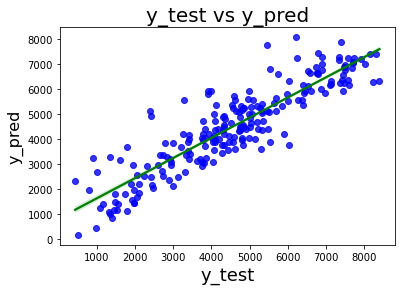

In [62]:
# Visualizing the fit on the test data

sb.regplot(x=y_test, y=predicted_value, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "green"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### INFERENCE
##### 1) Demand of bike is highly depend upon yr, holiday, temp, hum, windspeed, summer, winter, jul, sept, sun and moderate features.